In [2]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def fix_labels_and_verify_images():
    print("Starting setup and verification process...")
    
    BASE_DIR = 'Dog Emotion'
    if not os.path.exists(BASE_DIR):
        raise FileNotFoundError(f"Base directory '{BASE_DIR}' not found")
    csv_path = os.path.join(BASE_DIR, 'labels.csv')
    labels_df = pd.read_csv(csv_path)
    print(f"Original CSV loaded. Shape: {labels_df.shape}")
    new_data = []
    emotion_folders = ['happy', 'sad', 'angry', 'relaxed']
    
    for emotion in emotion_folders:
        emotion_path = os.path.join(BASE_DIR, emotion)
        if os.path.exists(emotion_path):
            files = os.listdir(emotion_path)
            print(f"Found {len(files)} files in {emotion} folder")
            for file in files:
                if file.endswith(('.jpg', '.jpeg', '.png')):
                    new_data.append({
                        'filename': f'{emotion}/{file}',
                        'label': emotion
                    })
    
    new_labels_df = pd.DataFrame(new_data)
    print(f"\nNew dataframe created. Shape: {new_labels_df.shape}")
    print("\nSample of new dataframe:")
    print(new_labels_df.head())
    new_csv_path = os.path.join(BASE_DIR, 'corrected_labels.csv')
    new_labels_df.to_csv(new_csv_path, index=False)
    print(f"\nSaved new labels to: {new_csv_path}")
    valid_images = []
    valid_labels = []
    
    for _, row in new_labels_df.iterrows():
        img_path = os.path.join(BASE_DIR, row['filename'])
        if os.path.exists(img_path):
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    valid_images.append(img_path)
                    valid_labels.append(row['label'])
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")
    
    print(f"\nFound {len(valid_images)} valid images out of {len(new_labels_df)} entries")
    
    return valid_images, valid_labels, new_labels_df

def main():
    try:
        valid_image_paths, valid_labels, new_labels_df = fix_labels_and_verify_images()
        
        if len(valid_image_paths) == 0:
            raise ValueError("No valid images found after correction")
        
        print("\nSuccessfully prepared the dataset!")
        print(f"Images per category:")
        print(new_labels_df['label'].value_counts())
        return True
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return False

if __name__ == "__main__":
    success = main()
    if success:
        print("\nYou can now proceed with model training using the corrected_labels.csv file")

Starting setup and verification process...
Original CSV loaded. Shape: (4000, 3)
Found 1000 files in happy folder
Found 1000 files in sad folder
Found 1000 files in angry folder
Found 1000 files in relaxed folder

New dataframe created. Shape: (4000, 2)

Sample of new dataframe:
                                      filename  label
0  happy/04FMq3exmYnLxQ85XzYhS0a9Mrb5Ic420.jpg  happy
1  happy/05fRy39hx2kiC09SbErKww536WBPym179.jpg  happy
2  happy/08mrG3hgF3M4bmy65ZJZBmYulhJ1es699.jpg  happy
3  happy/0dula1RWC0ZyjlrqEwuVHgtxHp5kme443.jpg  happy
4  happy/0fmy0dTY2aV0kGQ8UEDgWDrbGyxnac904.jpg  happy

Saved new labels to: Dog Emotion\corrected_labels.csv

Found 4000 valid images out of 4000 entries

Successfully prepared the dataset!
Images per category:
label
happy      1000
sad        1000
angry      1000
relaxed    1000
Name: count, dtype: int64

You can now proceed with model training using the corrected_labels.csv file


TensorFlow version: 2.17.0
GPU Available: []
Loading and preprocessing data...
Processing image 0/4000
Processing image 1000/4000
Processing image 2000/4000
Processing image 3000/4000
Data loading complete. X shape: (4000, 64, 64, 3), y shape: (4000, 4)


d:\Image_process\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/100


d:\Image_process\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.2660 - loss: 1.3943 - val_accuracy: 0.3150 - val_loss: 1.3698
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.3125 - loss: 1.3409 - val_accuracy: 0.3537 - val_loss: 1.3202
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.3397 - loss: 1.3146 - val_accuracy: 0.3625 - val_loss: 1.3111
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.3120 - loss: 1.3075 - val_accuracy: 0.3562 - val_loss: 1.2926
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3294 - loss: 1.3019 - val_accuracy: 0.3762 - val_loss: 1.2766
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.3469 - loss: 1.2917 - val_accuracy: 0.3675 - val_loss: 1.2700
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3456 - loss: 1.2878 - val_accuracy: 0.3700 - val_loss: 1.3019
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.3460 - loss: 1.2797 - val_a

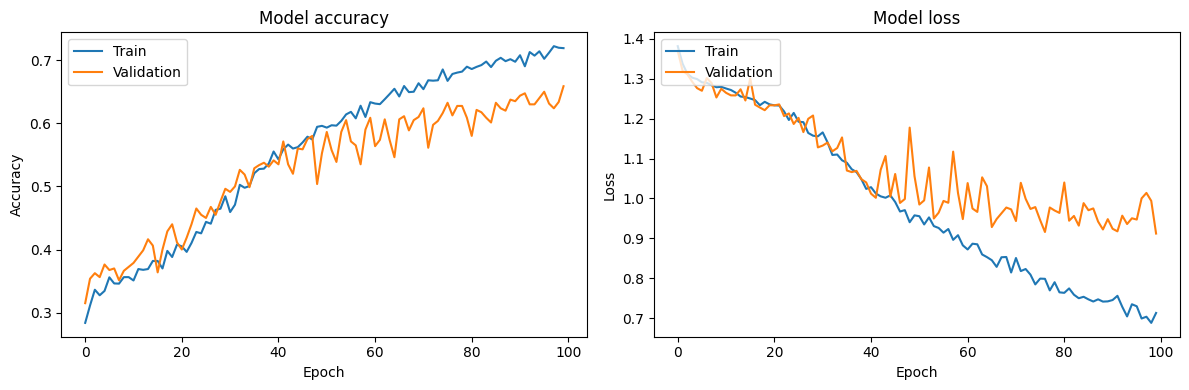

Model saved as 'dog_emotion_model.h5'

Testing model on sample images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Test image from angry folder: Predicted angry with 99.46% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test image from happy folder: Predicted happy with 99.84% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test image from relaxed folder: Predicted relaxed with 87.52% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test image from sad folder: Predicted sad with 42.01% confidence


In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def load_and_preprocess_data(base_dir='Dog Emotion', img_size=(64, 64)):
    print("Loading and preprocessing data...")
    labels_df = pd.read_csv(os.path.join(base_dir, 'corrected_labels.csv'))
    emotions = sorted(labels_df['label'].unique())
    emotion_to_id = {emotion: i for i, emotion in enumerate(emotions)}
    X = []
    y = []
    
    for idx, row in labels_df.iterrows():
        if idx % 1000 == 0:
            print(f"Processing image {idx}/{len(labels_df)}")
        
        img_path = os.path.join(base_dir, row['filename'])
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(emotion_to_id[row['label']])
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
    
    X = np.array(X, dtype='float32') / 255.0 
    y = to_categorical(np.array(y))
    
    print(f"Data loading complete. X shape: {X.shape}, y shape: {y.shape}")
    return X, y, emotions

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

def train_model():
    try:
        X, y, emotions = load_and_preprocess_data()

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        model = create_model(X_train.shape[1:], len(emotions))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )

        print("Training the model...")
        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=32),
            validation_data=(X_val, y_val),
            epochs=100
        )
        val_loss, val_acc = model.evaluate(X_val, y_val)
        print(f"\nValidation Accuracy: {val_acc*100:.2f}%")
        plot_training_history(history)
        model.save('dog_emotion_model.h5')
        print("Model saved as 'dog_emotion_model.h5'")
        
        return model, emotions
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None

def test_model(model, emotions, base_dir='Dog Emotion'):
    if model is None:
        print("No model available for testing")
        return
    
    print("\nTesting model on sample images...")
    
    for emotion in emotions:
        emotion_dir = os.path.join(base_dir, emotion)
        if os.path.exists(emotion_dir):
            files = os.listdir(emotion_dir)
            if files:
                test_img_path = os.path.join(emotion_dir, files[0])
                img = cv2.imread(test_img_path)
                img = cv2.resize(img, (64, 64))
                img_array = np.expand_dims(img, axis=0) / 255.0
                
                prediction = model.predict(img_array)
                predicted_emotion = emotions[np.argmax(prediction)]
                confidence = np.max(prediction)
                
                print(f"Test image from {emotion} folder: Predicted {predicted_emotion} with {confidence*100:.2f}% confidence")

if __name__ == "__main__":
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
    print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
    
    model, emotions = train_model()
    if model is not None:
        test_model(model, emotions)

In [ ]:
import numpy as np

# Function to calculate Gini Index
def gini_index(groups, classes):
    # Count all samples
    total_samples = float(sum([len(group) for group in groups]))
    gini = 0.0
    # For each group
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        # Calculate the score for each class
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / size
            score += proportion * proportion
        # Weight the group score by its size
        gini += (1.0 - score) * (size / total_samples)
    return gini

# Function to split the dataset based on an attribute and attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_score, best_groups = 999, 999, 999, None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    return {'index': best_index, 'value': best_value, 'groups': best_groups}

# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Recursive splitting
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # Check if either left or right group is empty
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # Check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # Process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth + 1)
    # Process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth + 1)

# Build the decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

# Make a prediction with the decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

# Testing the Decision Tree
# Example dataset [Feature1, Feature2, ..., Label]
dataset = [[2.771244718, 1.784783929, 0],
           [1.728571309, 1.169761413, 0],
           [3.678319846, 2.81281357, 0],
           [3.961043357, 2.61995032, 0],
           [2.999208922, 2.209014212, 0],
           [7.497545867, 3.162953546, 1],
           [9.00220326,  3.339047188, 1],
           [7.444542326, 0.476683375, 1],
           [10.12493903, 3.234550982, 1],
           [6.642287351, 3.319983761, 1]]

# Train the decision tree
tree = build_tree(dataset, max_depth=3, min_size=1)

# Print the tree (for demonstration)
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print(f'{"|"*depth} [X{node["index"]} < {node["value"]}]')
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print(f'{"|"*depth} [{node}]')

print_tree(tree)

# Test predictions
for row in dataset:
    prediction = predict(tree, row)
    print(f'Expected={row[-1]}, Got={prediction}')
